In [3]:
# 인공지능 라이브러리 불러오기
from keras.applications.inception_v3 import * # InceptionV3, preprocess_input

In [5]:
# 추가 라이브러리 불러오기
import keras.utils as image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 이미 학습된 모델(Pre-Trained Model) 불러오기
model = InceptionV3(weights='imagenet', include_top=True) # 그대로 쓰는 경우 -> include_top = True

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
# 모델 정보
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [8]:
# weight 값을 확인
model.get_weights()

[array([[[[-4.59105551e-01, -4.14526574e-02, -3.62577499e-03,
           -9.87672508e-02, -3.37070860e-02,  4.79929037e-02,
            2.32542142e-01,  3.23927671e-01,  5.90160079e-02,
            9.47738215e-02,  4.24996056e-02,  1.26620471e-01,
            1.33215979e-01,  1.22741833e-01, -7.92686343e-02,
            2.08227970e-02, -1.99647829e-01, -3.02687973e-01,
           -2.10659921e-01, -3.52898419e-01, -5.58023095e-01,
            3.20223093e-01,  4.53596050e-03, -3.09266411e-02,
           -6.86957911e-02,  2.00968519e-01,  1.14542745e-01,
            2.40372881e-01,  1.52943470e-02,  5.96231259e-02,
           -5.85714653e-02,  8.78173351e-01],
          [ 3.16376328e-01, -4.78494260e-03, -6.84681814e-03,
            7.44503662e-02, -1.97458476e-01,  5.20143658e-02,
           -1.24460436e-01,  3.36123914e-01,  3.01678218e-02,
           -1.26477107e-01, -1.05597451e-01, -5.31241074e-02,
           -2.43102223e-01,  1.66047230e-01, -1.03186309e-01,
           -6.55613691e-

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
[[('n02123159', 'tiger_cat', 0.5648994), ('n02123045', 'tabby', 0.20774257), ('n02124075', 'Egyptian_cat', 0.08127102), ('n02971356', 'carton', 0.01607447), ('n04152593', 'screen', 0.009367915)]]


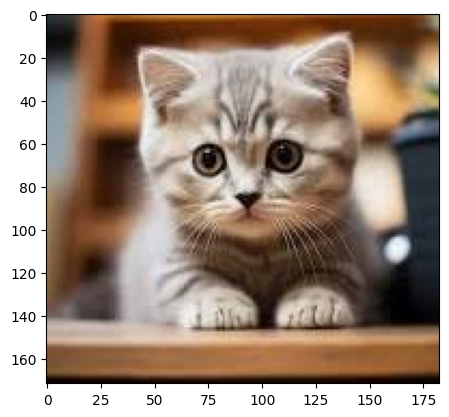

Top[1] => tiger_cat, 0.5648993849754333
Top[2] => tabby, 0.2077425718307495
Top[3] => Egyptian_cat, 0.08127102255821228
Top[4] => carton, 0.016074469313025475
Top[5] => screen, 0.009367914870381355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[('n02328150', 'Angora', 0.17213553), ('n02124075', 'Egyptian_cat', 0.09904062), ('n02326432', 'hare', 0.09413373), ('n02123394', 'Persian_cat', 0.03654694), ('n02441942', 'weasel', 0.026171647)]]


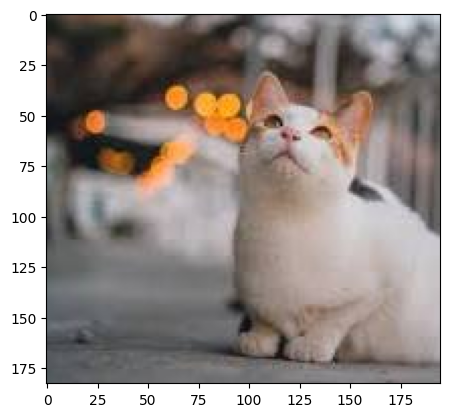

Top[1] => Angora, 0.17213553190231323
Top[2] => Egyptian_cat, 0.09904062002897263
Top[3] => hare, 0.09413372725248337
Top[4] => Persian_cat, 0.036546941846609116
Top[5] => weasel, 0.026171647012233734
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[('n04235860', 'sleeping_bag', 0.13754682), ('n03958227', 'plastic_bag', 0.13516064), ('n03482405', 'hamper', 0.068938754), ('n02124075', 'Egyptian_cat', 0.057873953), ('n02123045', 'tabby', 0.052034285)]]


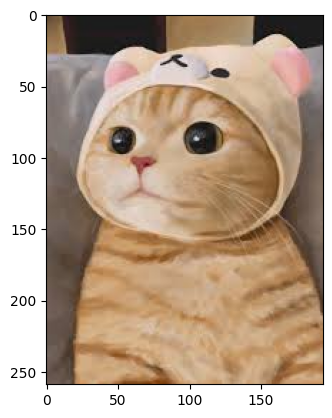

Top[1] => sleeping_bag, 0.1375468224287033
Top[2] => plastic_bag, 0.1351606398820877
Top[3] => hamper, 0.06893875449895859
Top[4] => Egyptian_cat, 0.05787395313382149
Top[5] => tabby, 0.05203428491950035


In [14]:
# 성능 테스트
for i in range(1, 4):
    img_path = f'./test_img/cat{i}.jpg'
    img = image.load_img(img_path, target_size=(299, 299))  # input_layer (InputLayer) = (None, 299, 299, 3)
    # 입력 형식에 맞게 수정
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    # print(x)
    x = preprocess_input(x)

    # 예측
    pre_rst = model.predict(x)
    rst = decode_predictions(pre_rst, top = 5) # 예측한 것들 중에 top 5
    print(rst)

    # 이미지 표시
    plt.imshow(image.load_img(img_path))
    plt.show()

    # 어떤 것을 검출했는지 확인
    for ii in range(5):
        print("Top[{}] => {}, {}".format(
            ii + 1,
            rst[0][ii][1],
            rst[0][ii][2],
        ))


In [ ]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
print(arr.shape)
expanded_arr = no.expand_dims()